In [182]:
import numpy as np
import pandas as pd
%matplotlib inline 
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

housing = pd.read_csv('./data/Ames_Housing_Price_Data.csv', index_col=0)
housing.shape

In [95]:
housing.head() 

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [96]:
len(housing.PID.unique())

2579

In [97]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [98]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyl

#### Check for missing values

In [99]:
pd.set_option('display.max_rows', housing.shape[0]+1)

housing.isna().sum()

PID                 0
GrLivArea           0
SalePrice           0
MSSubClass          0
MSZoning            0
LotFrontage       462
LotArea             0
Street              0
Alley            2412
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         14
MasVnrArea         14
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           69
BsmtCond           69
BsmtExposure       71
BsmtFinType1       69
BsmtFinSF1          1
BsmtFinType2       70
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF  

In [100]:
missingCols = housing.isnull().sum(axis=0) > 0
print('COLUMNS with MISSING \n %s' %(housing.columns[missingCols]))
len(housing.columns[missingCols])

COLUMNS with MISSING 
 Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')


27

In [101]:
housing.shape

(2580, 81)

In [102]:
housing = housing.drop(columns=['Alley', 'MiscFeature', 'SaleCondition', 'SaleType', 'MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'CentralAir', 'PoolQC', 'Fence'])
housing.shape

(2580, 69)

In [103]:
values = {'FireplaceQu':'No Fireplace', 'GarageType':'No Garage', 'GarageFinish':'No Garage', 'GarageQual':'No Garage', 'GarageCond': 'No Garage', 'BsmtQual':'No Basement', 'BsmtCond':'No Basement', 'BsmtExposure':'No Basement', 'BsmtFinType1':'No Basement', 'BsmtFinType2':'No Basement'}

housing = housing.fillna(value=values)
housing[['FireplaceQu']].isnull().sum()
# Separately GarageYrBlt <- for null values, replace with the House YearBuilt 

FireplaceQu    0
dtype: int64

In [104]:
housing[['BsmtQual']].isnull().sum()

BsmtQual    0
dtype: int64

In [105]:
# Impute the GarageYrBlt null values with House YearBuilt values: 
missingRowIndexes = housing.GarageYrBlt.isnull()
housing.loc[missingRowIndexes,'GarageYrBlt'] = housing.loc[missingRowIndexes,'YearBuilt']
housing[['GarageYrBlt']].isnull().sum()

GarageYrBlt    0
dtype: int64

In [107]:
missingRowIndexes = housing.LotFrontage.isnull()
housing.loc[missingRowIndexes,'LotFrontage'] = -1
housing.LotFrontage.isnull().sum()

0

In [110]:
values = {'MasVnrType':'Missing', 'MasVnrArea':-1, 'BsmtFinSF1':-1, 'BsmtFinSF2':-1, 'BsmtUnfSF':-1, 'TotalBsmtSF':-1, 'BsmtFullBath':-1, 'BsmtHalfBath':-1, 'Electrical':'Missing', 'GarageCars':-1, 'GarageArea':-1 }

housing = housing.fillna(value=values)
housing.isnull().sum(axis=0)

PID             0
GrLivArea       0
SalePrice       0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Fireplaces

In [121]:
housing.loc[housing['PID']== 910201180, 'GarageYrBlt']=-1
housing.loc[housing['PID']== 903426160,'GarageYrBlt']=-1
housing.loc[housing['PID']== 910201180,'GarageFinish']='Missing'
housing.loc[housing['PID']== 903426160,'GarageFinish']='Missing'

In [122]:
housing.loc[housing['PID']== 907194130,'BsmtExposure']='Missing'
housing.loc[housing['PID']== 528445060,'BsmtExposure']='Missing'
housing.loc[housing['PID']== 528142130,'BsmtFinType2']='Missing'

In [131]:
quality = housing[['SalePrice','OverallQual', 'YearBuilt','YearRemodAdd', 'BldgType','HouseStyle', 'ExterQual', 'KitchenQual', 'BsmtQual', 'BsmtExposure', 'Foundation', 'GarageType','GarageYrBlt', 'GarageFinish', 'Exterior1st']]
quality.shape

(2580, 15)

In [132]:
quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     2580 non-null   int64  
 1   OverallQual   2580 non-null   int64  
 2   YearBuilt     2580 non-null   int64  
 3   YearRemodAdd  2580 non-null   int64  
 4   BldgType      2580 non-null   object 
 5   HouseStyle    2580 non-null   object 
 6   ExterQual     2580 non-null   object 
 7   KitchenQual   2580 non-null   object 
 8   BsmtQual      2580 non-null   object 
 9   BsmtExposure  2580 non-null   object 
 10  Foundation    2580 non-null   object 
 11  GarageType    2580 non-null   object 
 12  GarageYrBlt   2580 non-null   float64
 13  GarageFinish  2580 non-null   object 
 14  Exterior1st   2580 non-null   object 
dtypes: float64(1), int64(4), object(10)
memory usage: 322.5+ KB


In [133]:
#OverallQual: Rates the overall material and finish of the house (1:VeryPoor -> 10:Very Excellent)
quality['OverallQual'].value_counts()

5     753
6     669
7     525
8     290
4     195
9      80
3      32
10     20
2      13
1       3
Name: OverallQual, dtype: int64

<AxesSubplot:ylabel='Frequency'>

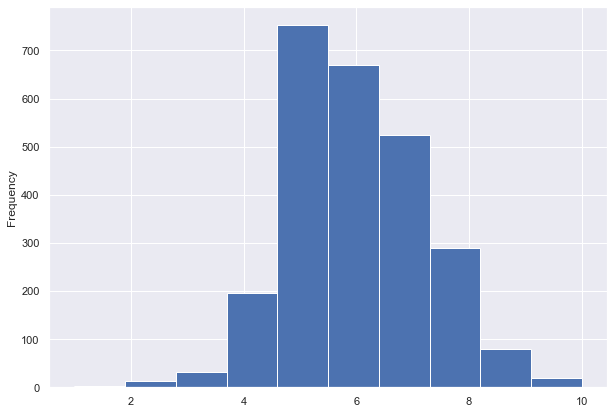

In [169]:
#OverallQual: Rates the overall material and finish of the house (1:VeryPoor -> 10:Very Excellent)
quality.OverallQual.plot.hist(figsize=(10,7))

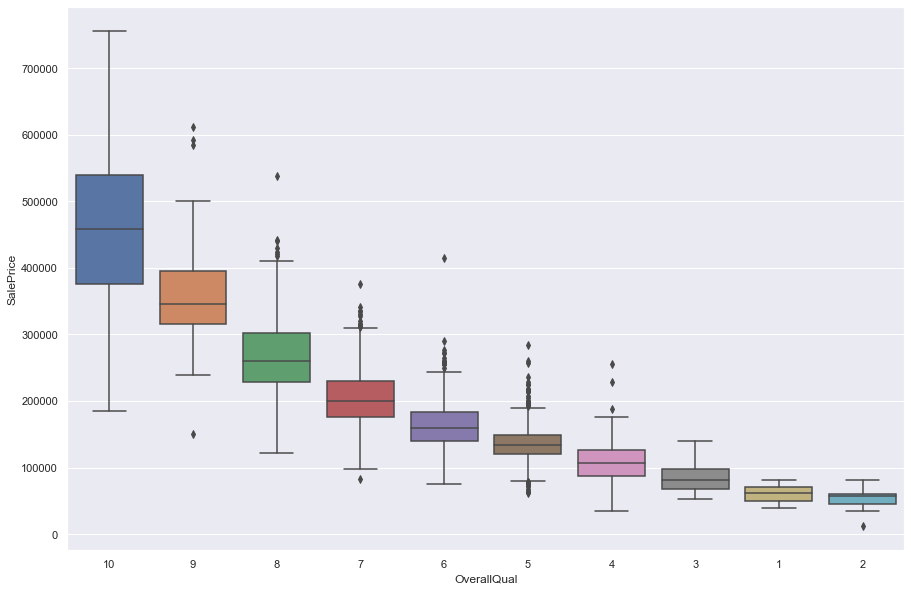

In [150]:
ordered=quality.groupby(by=["OverallQual"])["SalePrice"].median().sort_values(ascending=False).index
sns.boxplot(x='OverallQual', y='SalePrice', data= quality, order=ordered)
sns.set(rc={'figure.figsize':(10,15)})

In [286]:
quality['OverallQual'].value_counts()

5     753
6     669
7     525
8     290
4     195
9      80
3      32
10     20
2      13
1       3
Name: OverallQual, dtype: int64

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

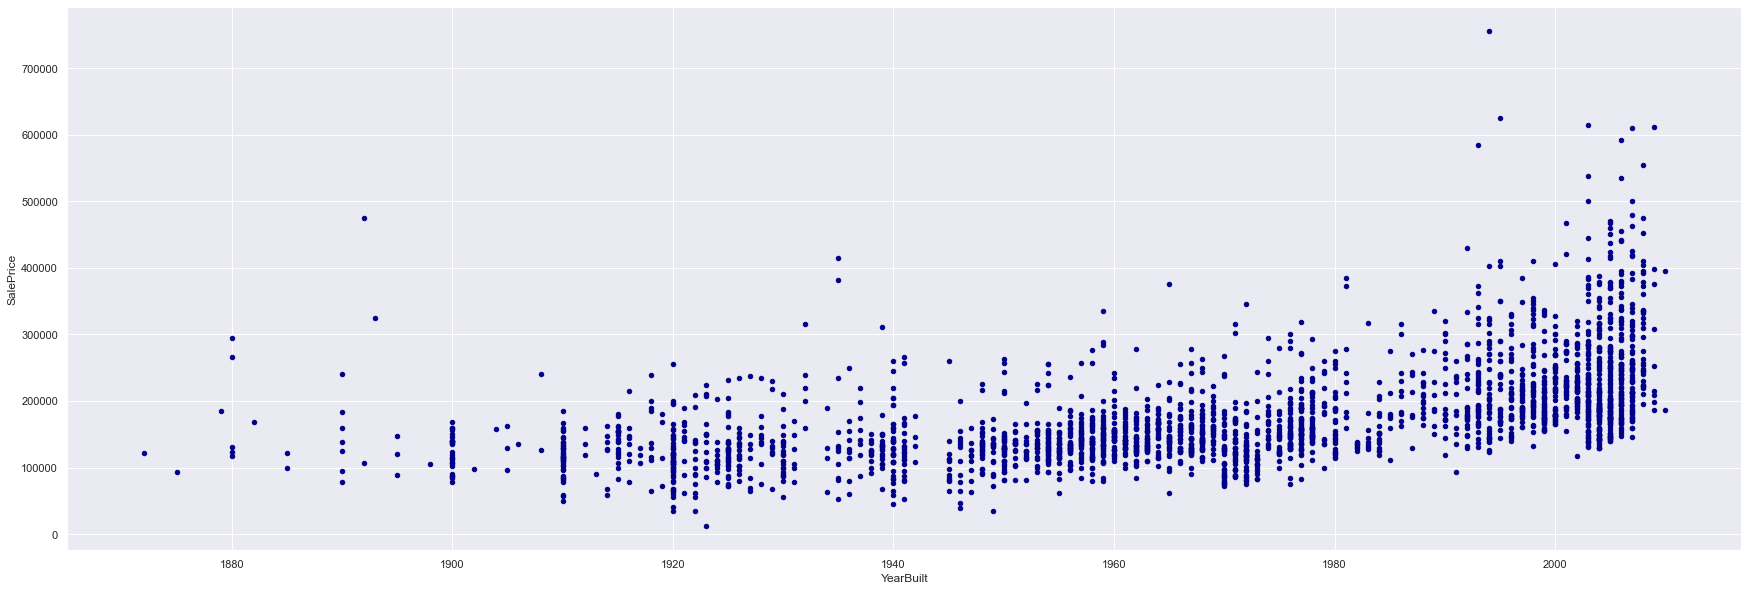

In [175]:
quality.plot.scatter(x='YearBuilt', y='SalePrice', c='DarkBlue')

In [199]:
glabel=list(quality.YearBuilt)
glabel[:3]

[1939, 1984, 1930]

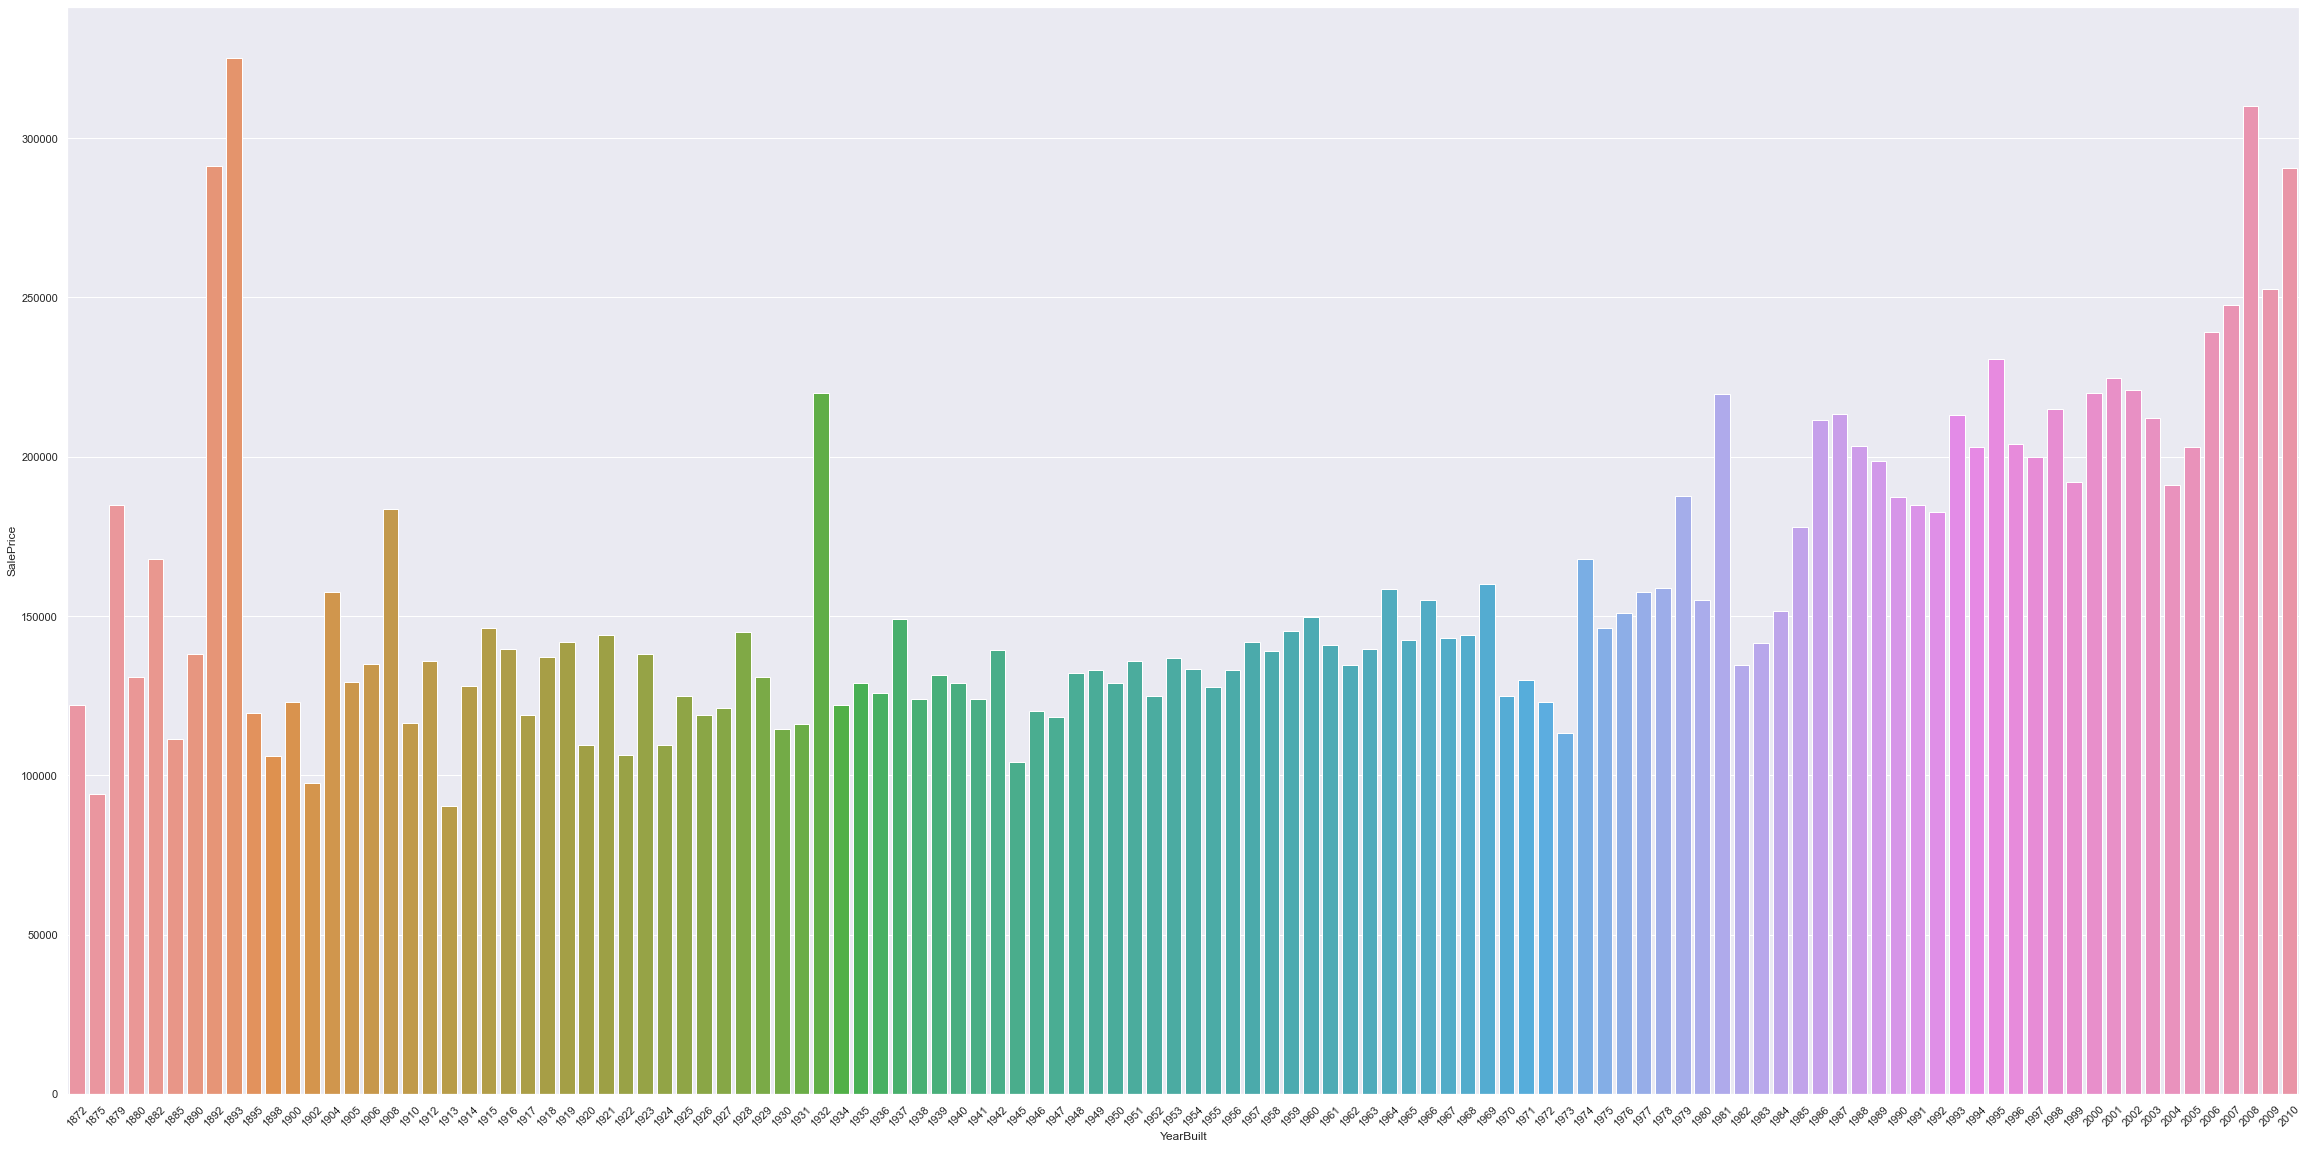

In [242]:
medianPriceYearBuilt = quality.groupby(by=["YearBuilt"])["SalePrice"].median().to_frame()
medianPriceYearBuilt.reset_index(inplace=True)
sns.barplot(x='YearBuilt', y='SalePrice', data= medianPriceYearBuilt)
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(40,20)})

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

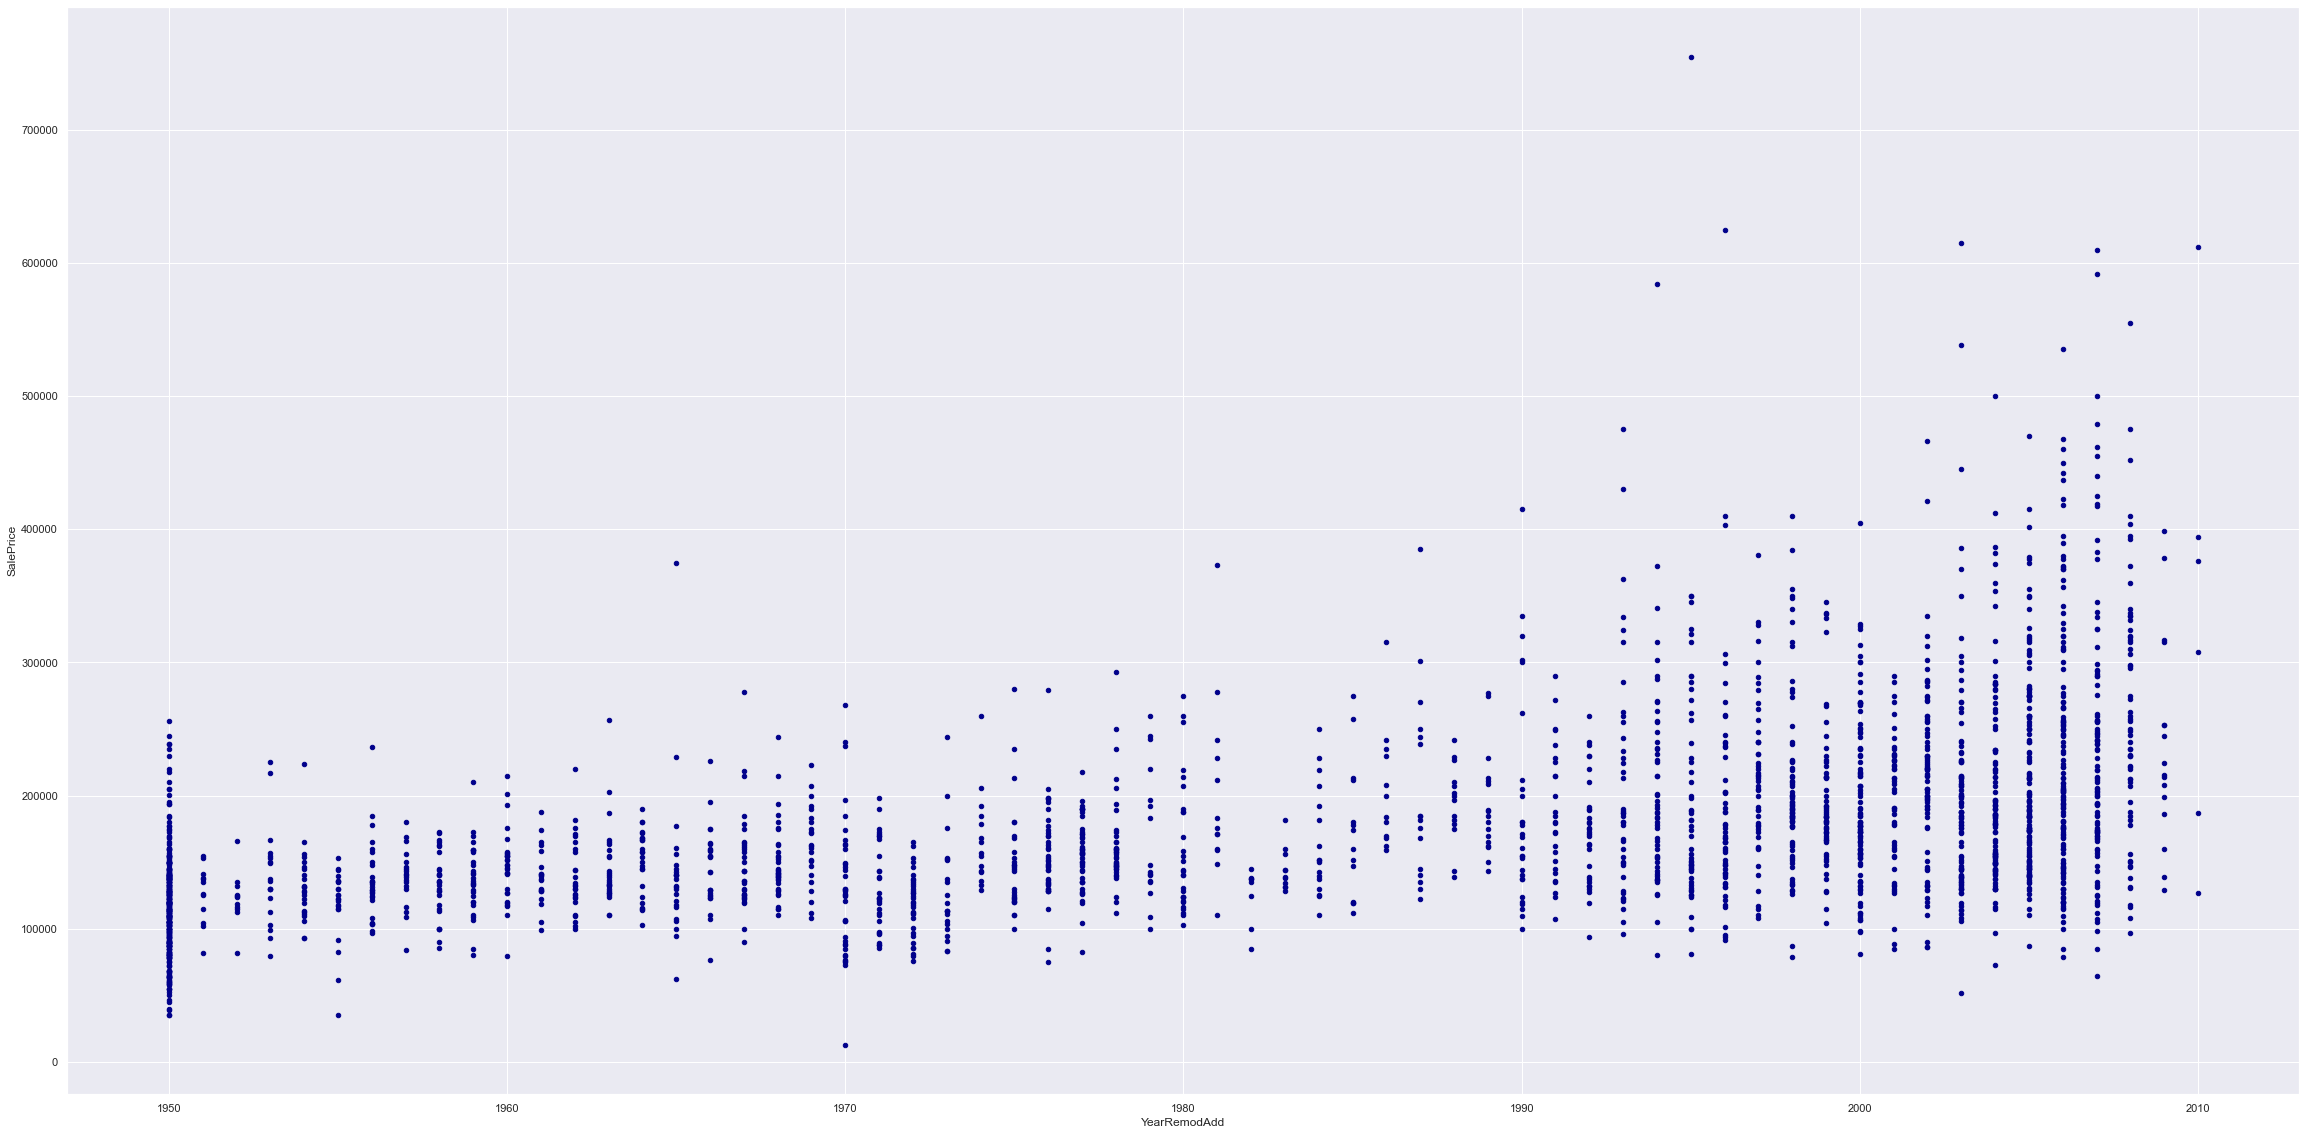

In [205]:
quality.plot.scatter(x='YearRemodAdd', y='SalePrice', c='DarkBlue')

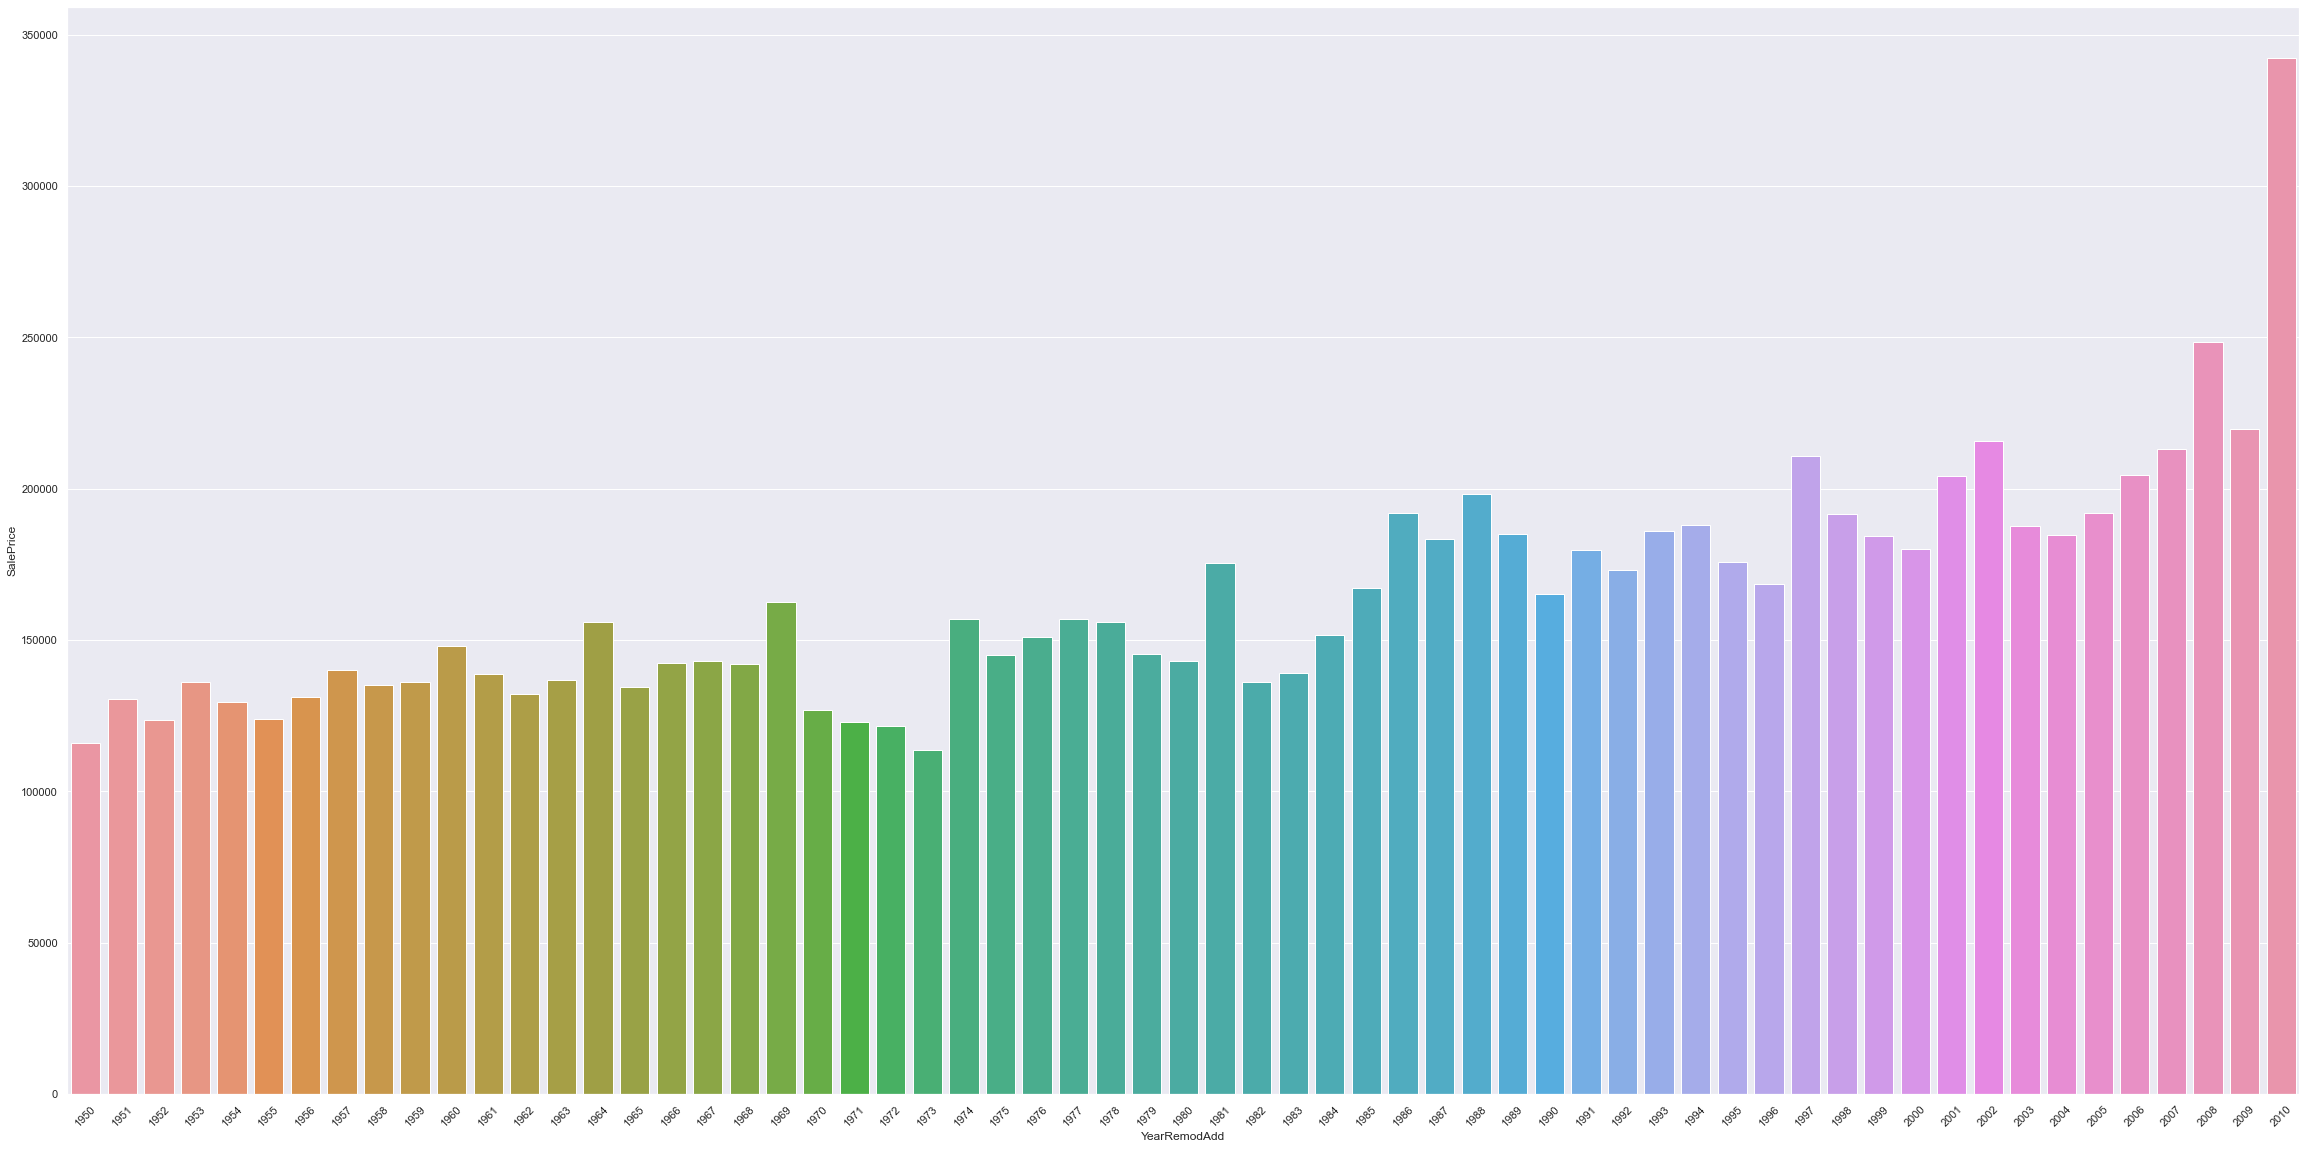

In [243]:
medianPriceYearRemod = quality.groupby(by=["YearRemodAdd"])["SalePrice"].median().to_frame()
medianPriceYearRemod.reset_index(inplace=True)
sns.barplot(x='YearRemodAdd', y='SalePrice', data= medianPriceYearRemod)
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(40,20)})

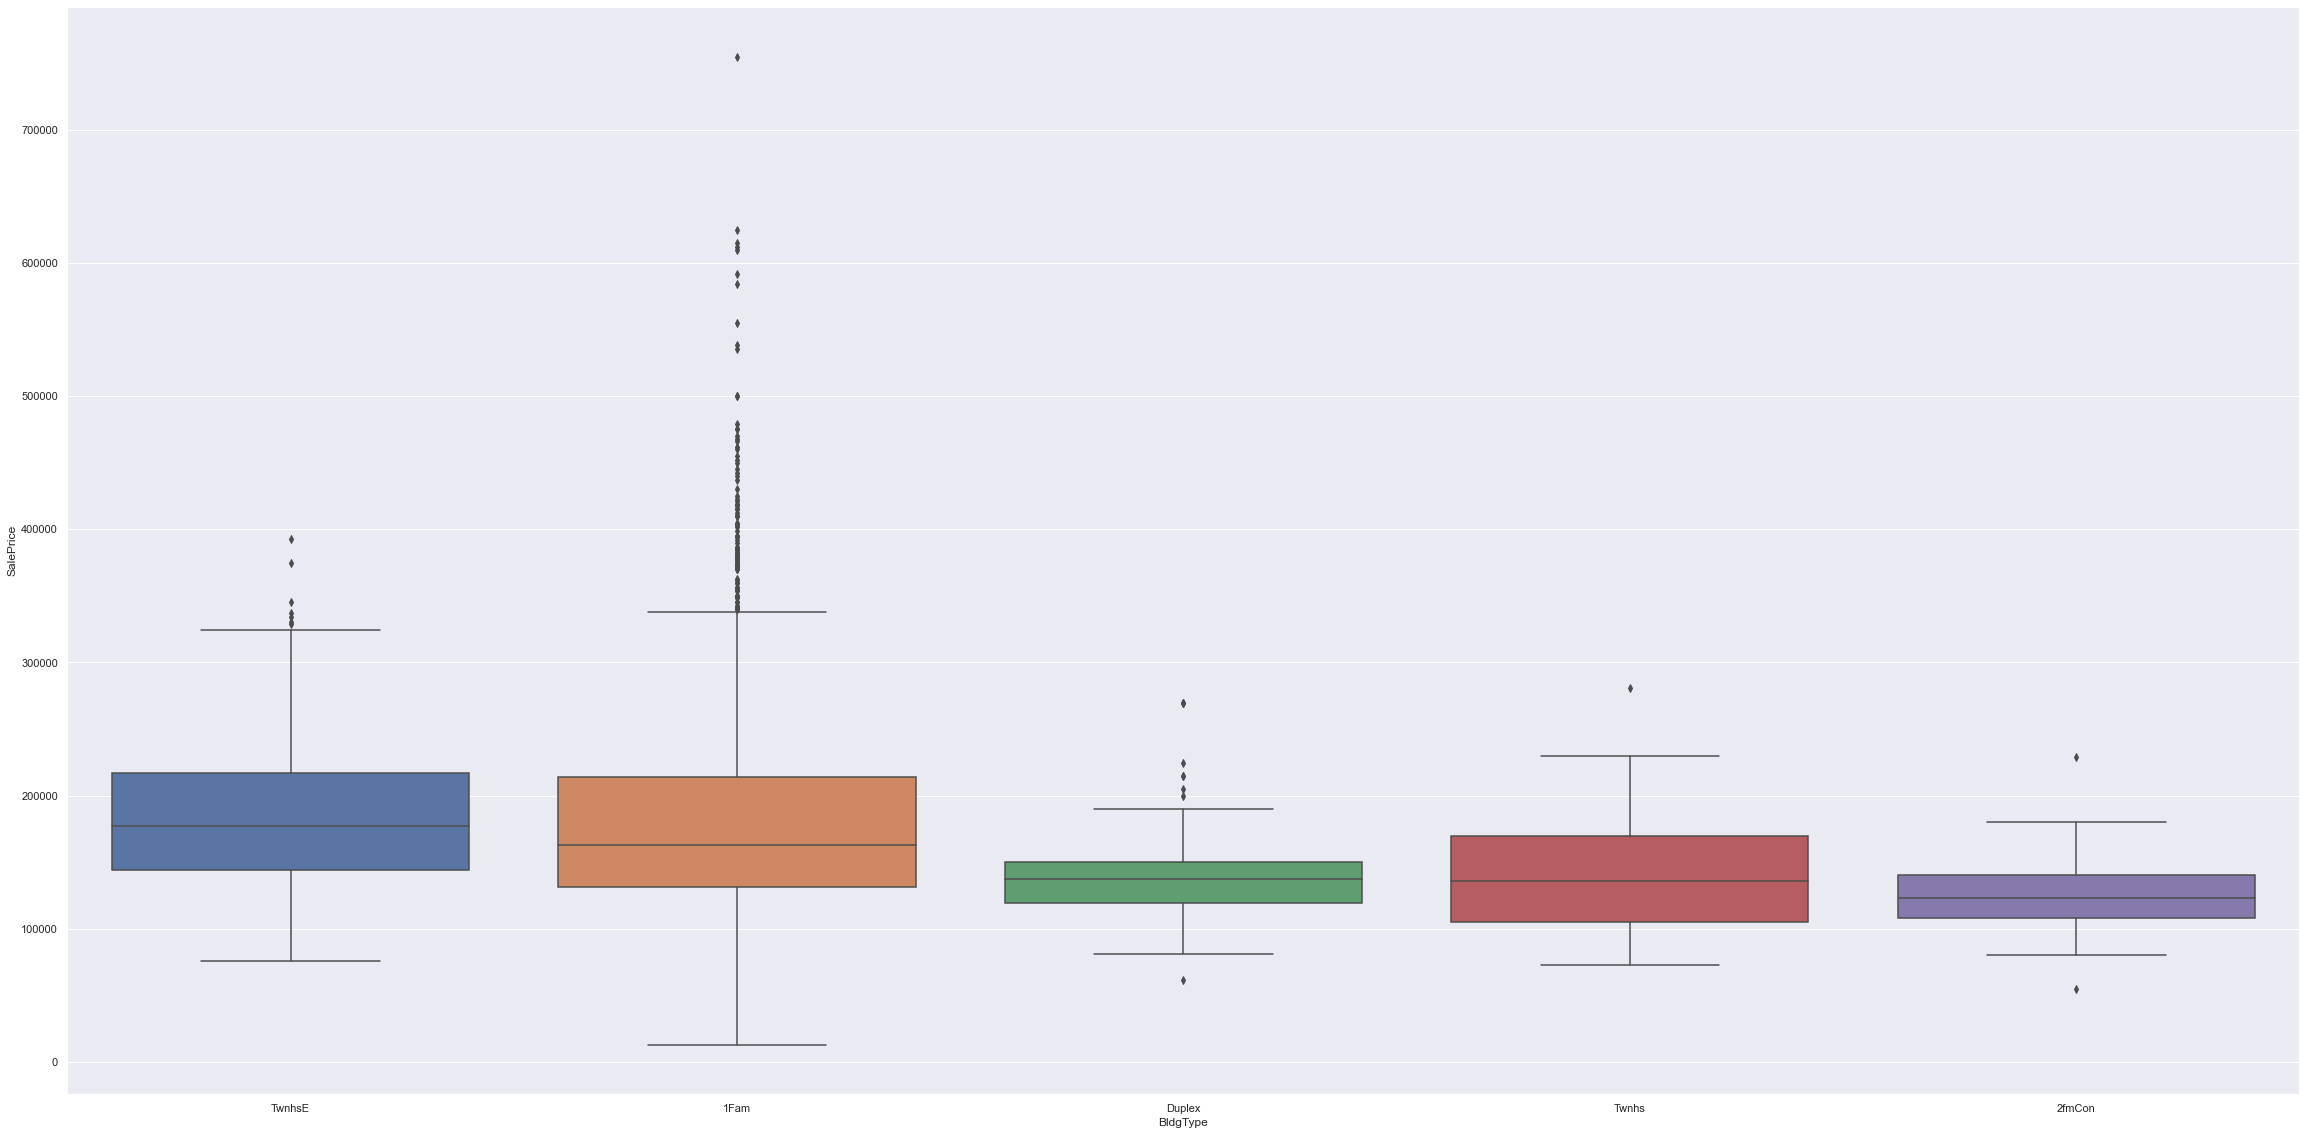

In [244]:
# BldgType: Type of dwelling
#        1Fam	Single-family Detached	
#        2FmCon	Two-family Conversion; originally built as one-family dwelling
#        Duplx	Duplex
#        TwnhsE	Townhouse End Unit
#        TwnhsI	Townhouse Inside Unit
ordered=quality.groupby(by=["BldgType"])["SalePrice"].median().sort_values(ascending=False).index
sns.boxplot(x='BldgType', y='SalePrice', data= quality, order=ordered)
sns.set(rc={'figure.figsize':(10,15)})    

In [252]:
# BldgType: Type of dwelling
#        1Fam	Single-family Detached	
#        2FmCon	Two-family Conversion; originally built as one-family dwelling
#        Duplx	Duplex
#        TwnhsE	Townhouse End Unit
#        TwnhsI	Townhouse Inside Unit
quality['BldgType'].value_counts()

1Fam      2139
TwnhsE     202
Twnhs       98
Duplex      87
2fmCon      54
Name: BldgType, dtype: int64

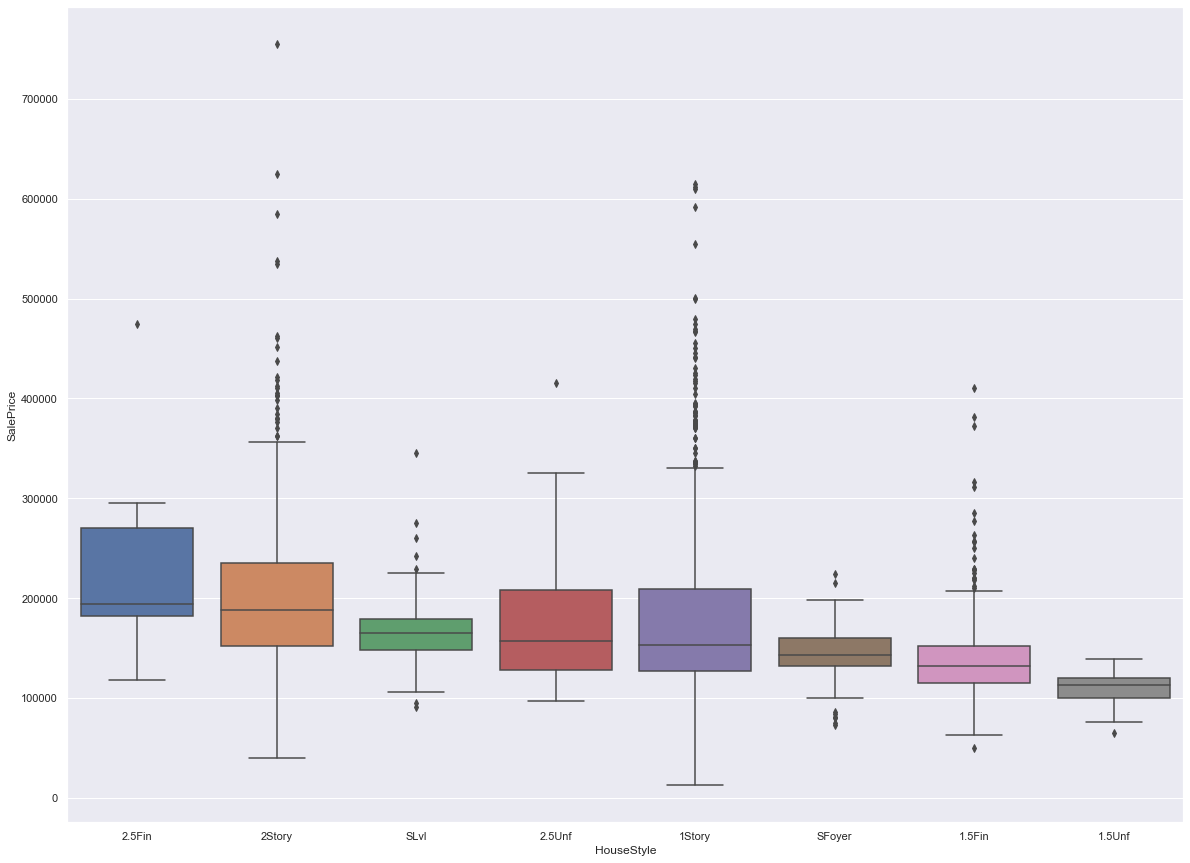

In [248]:
# HouseStyle: Style of dwelling
#        1Story	One story
#        1.5Fin	One and one-half story: 2nd level finished
#        1.5Unf	One and one-half story: 2nd level unfinished
#        2Story	Two story
#        2.5Fin	Two and one-half story: 2nd level finished
#        2.5Unf	Two and one-half story: 2nd level unfinished
#        SFoyer	Split Foyer
#        SLvl	Split Level
ordered=quality.groupby(by=["HouseStyle"])["SalePrice"].median().sort_values(ascending=False).index
sns.boxplot(x='HouseStyle', y='SalePrice', data= quality, order=ordered)
sns.set(rc={'figure.figsize':(20,15)}) 

In [253]:
# HouseStyle: Style of dwelling
#        1Story	One story
#        1.5Fin	One and one-half story: 2nd level finished
#        1.5Unf	One and one-half story: 2nd level unfinished
#        2Story	Two story
#        2.5Fin	Two and one-half story: 2nd level finished
#        2.5Unf	Two and one-half story: 2nd level unfinished
#        SFoyer	Split Foyer
#        SLvl	Split Level
quality['HouseStyle'].value_counts()

1Story    1288
2Story     773
1.5Fin     284
SLvl       118
SFoyer      70
2.5Unf      22
1.5Unf      19
2.5Fin       6
Name: HouseStyle, dtype: int64

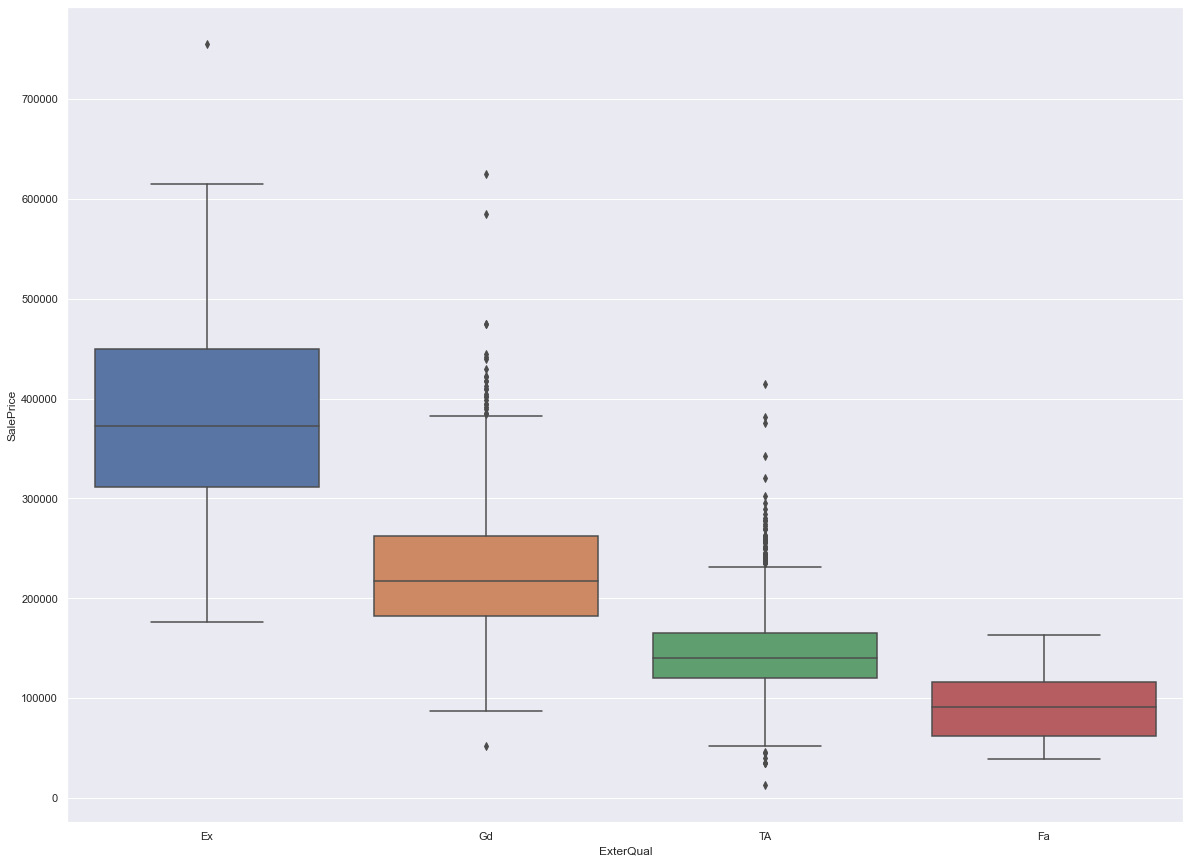

In [249]:
#ExterQual: Evaluates the quality of the material on the exterior (Poor -> Excellent)
ordered=quality.groupby(by=["ExterQual"])["SalePrice"].median().sort_values(ascending=False).index
sns.boxplot(x='ExterQual', y='SalePrice', data= quality, order=ordered)
sns.set(rc={'figure.figsize':(20,15)}) 

In [250]:
#ExterQual: Evaluates the quality of the material on the exterior (Poor -> Excellent)
quality['ExterQual'].value_counts()

TA    1636
Gd     841
Ex      73
Fa      30
Name: ExterQual, dtype: int64

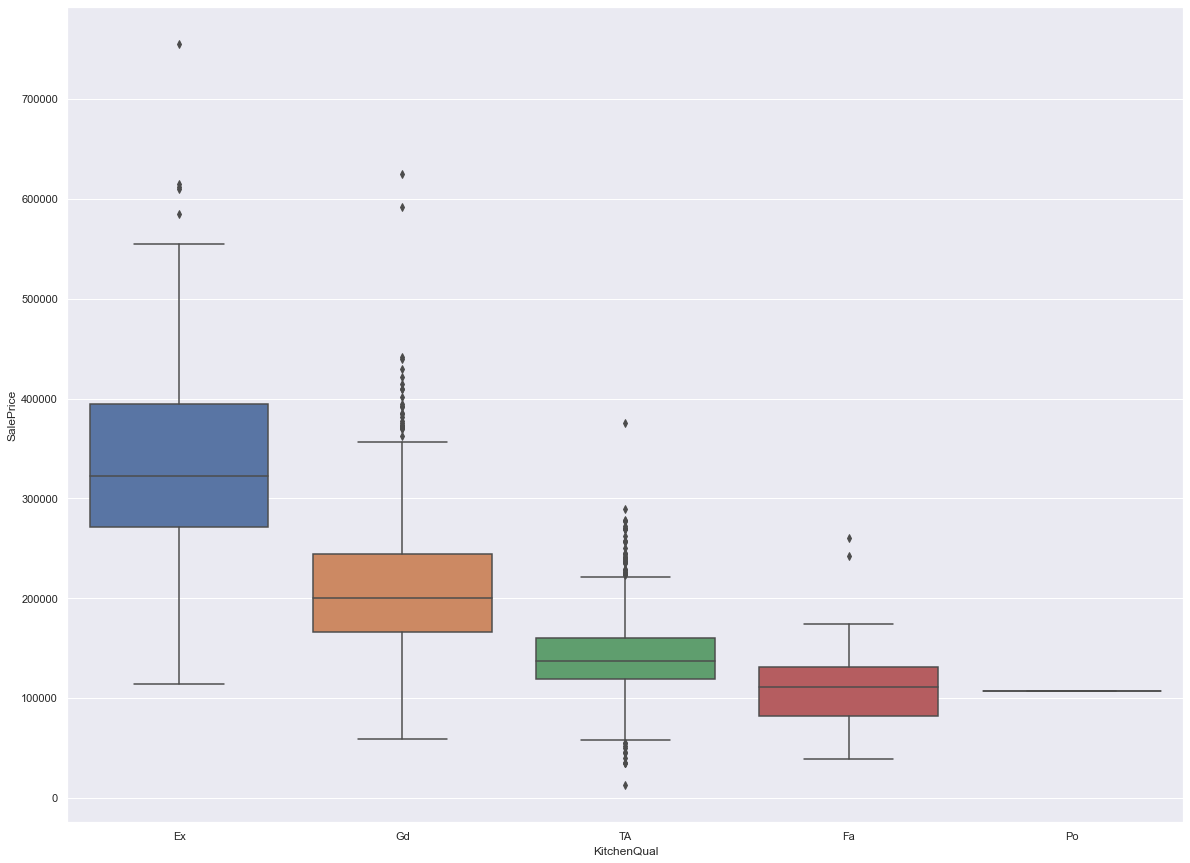

In [255]:
#KitchenQual: Kitchen quality (Poor -> Excellent)
ordered=quality.groupby(by=["KitchenQual"])["SalePrice"].median().sort_values(ascending=False).index
sns.boxplot(x='KitchenQual', y='SalePrice', data= quality, order=ordered)
sns.set(rc={'figure.figsize':(20,15)}) 

In [254]:
#KitchenQual: Kitchen quality (Poor -> Excellent)
quality['KitchenQual'].value_counts()

TA    1358
Gd    1017
Ex     142
Fa      62
Po       1
Name: KitchenQual, dtype: int64

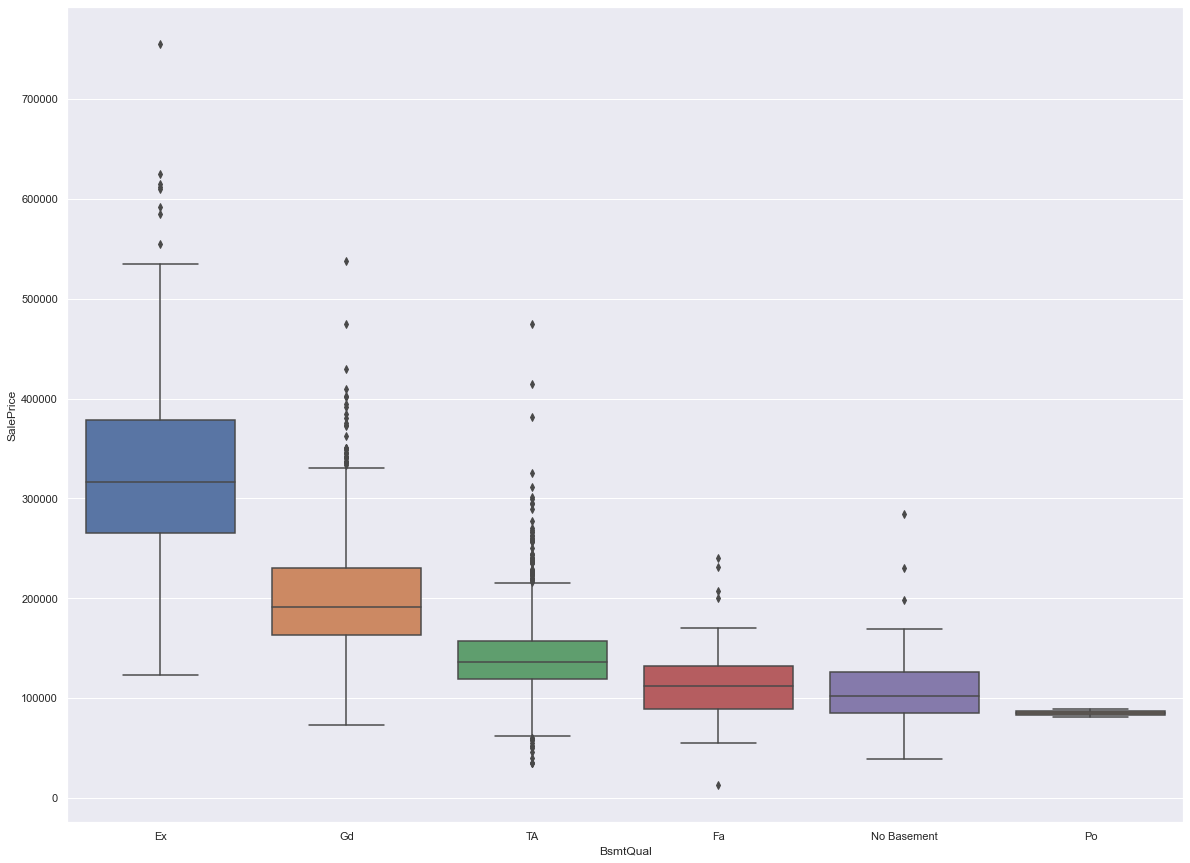

In [257]:
# BsmtQual: Evaluates the height of the basement
#        Ex	Excellent (100+ inches)	
#        Gd	Good (90-99 inches)
#        TA	Typical (80-89 inches)
#        Fa	Fair (70-79 inches)
#        Po	Poor (<70 inches
ordered=quality.groupby(by=["BsmtQual"])["SalePrice"].median().sort_values(ascending=False).index
sns.boxplot(x='BsmtQual', y='SalePrice', data= quality, order=ordered)
sns.set(rc={'figure.figsize':(20,15)}) 

In [256]:
# BsmtQual: Evaluates the height of the basement
#        Ex	Excellent (100+ inches)	
#        Gd	Good (90-99 inches)
#        TA	Typical (80-89 inches)
#        Fa	Fair (70-79 inches)
#        Po	Poor (<70 inches
quality['BsmtQual'].value_counts()

TA             1166
Gd             1077
Ex              188
Fa               78
No Basement      69
Po                2
Name: BsmtQual, dtype: int64

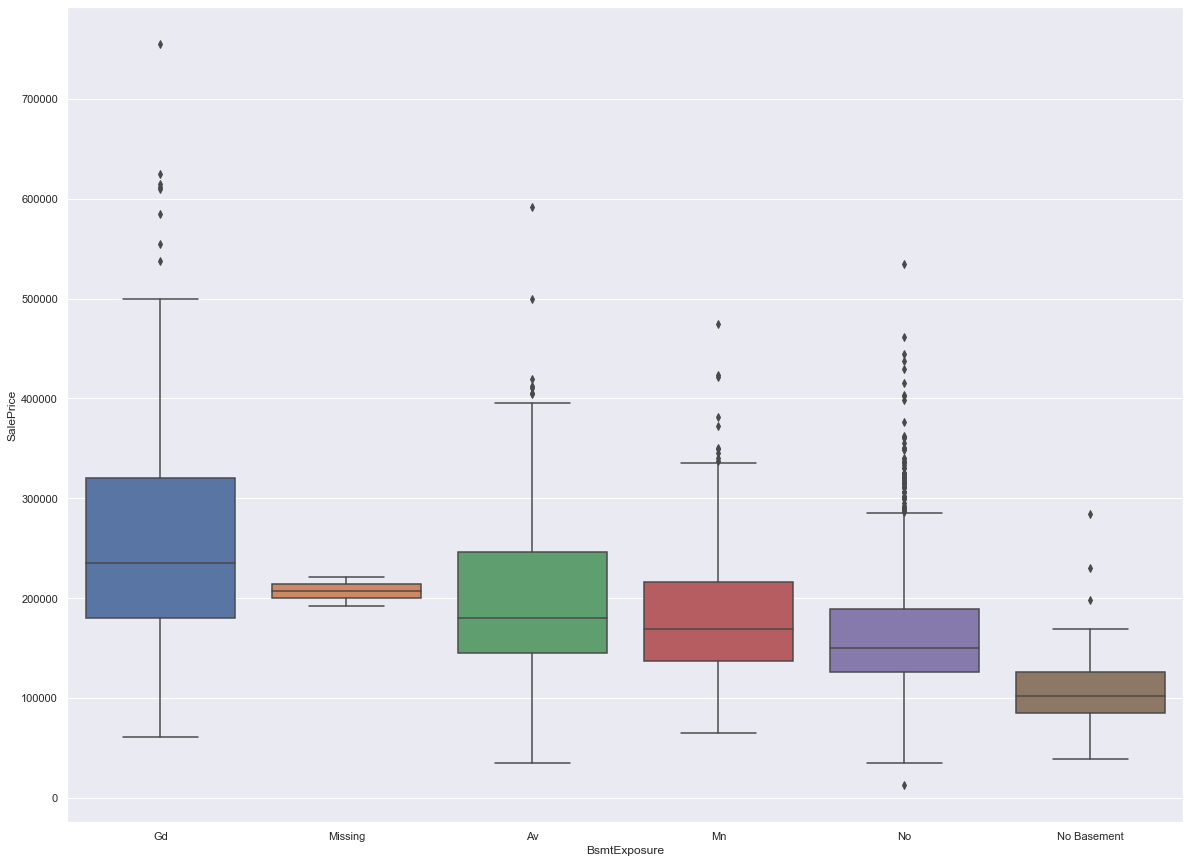

In [259]:
# BsmtExposure: Refers to walkout or garden level walls
#        Gd	Good Exposure
#        Av	Average Exposure (split levels or foyers typically score average or above)	
#        Mn	Mimimum Exposure
#        No	No Exposure
ordered=quality.groupby(by=["BsmtExposure"])["SalePrice"].median().sort_values(ascending=False).index
sns.boxplot(x='BsmtExposure', y='SalePrice', data= quality, order=ordered)
sns.set(rc={'figure.figsize':(20,15)}) 

In [258]:
# BsmtExposure: Refers to walkout or garden level walls
#        Gd	Good Exposure
#        Av	Average Exposure (split levels or foyers typically score average or above)	
#        Mn	Mimimum Exposure
#        No	No Exposure
quality['BsmtExposure'].value_counts()

No             1708
Av              344
Gd              242
Mn              215
No Basement      69
Missing           2
Name: BsmtExposure, dtype: int64

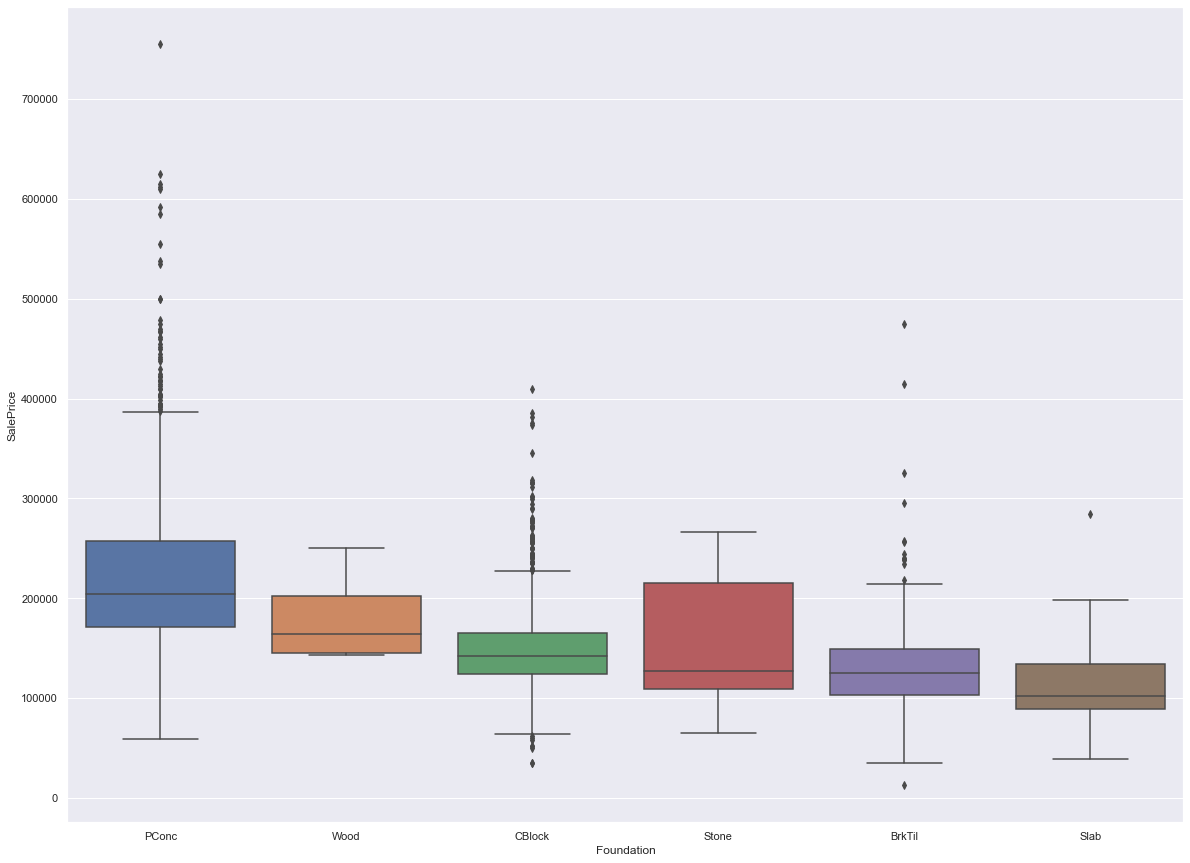

In [262]:
#Foundation: Type of foundation
#        BrkTil	Brick & Tile
#        CBlock	Cinder Block
#        PConc	Poured Contrete	
#        Slab	Slab
#        Stone	Stone
#        Wood	Wood
ordered=quality.groupby(by=["Foundation"])["SalePrice"].median().sort_values(ascending=False).index
sns.boxplot(x='Foundation', y='SalePrice', data= quality, order=ordered)
sns.set(rc={'figure.figsize':(20,15)}) 

In [261]:
# Foundation: Type of foundation
#        BrkTil	Brick & Tile
#        CBlock	Cinder Block
#        PConc	Poured Contrete	
#        Slab	Slab
#        Stone	Stone
#        Wood	Wood
quality['Foundation'].value_counts()

CBlock    1140
PConc     1105
BrkTil     278
Slab        42
Stone       10
Wood         5
Name: Foundation, dtype: int64

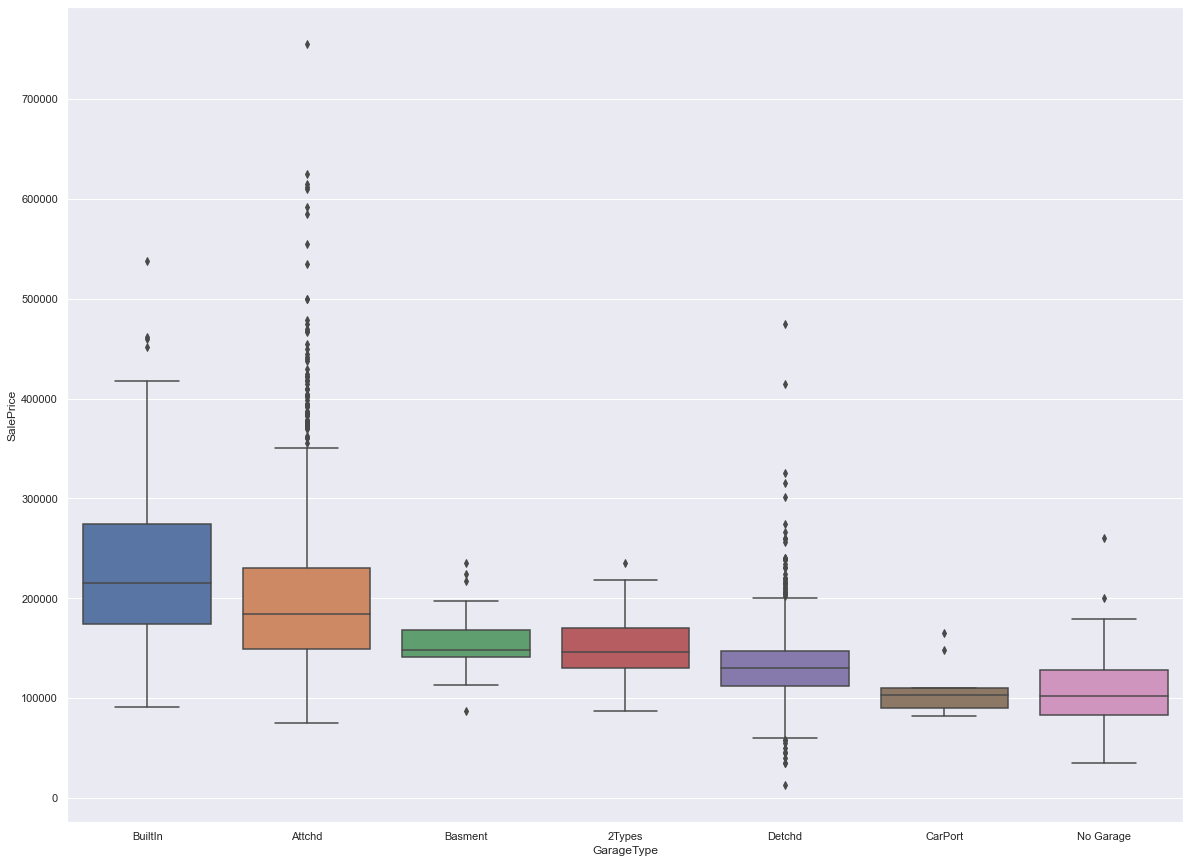

In [264]:
# GarageType: Garage location
#        2Types	More than one type of garage
#        Attchd	Attached to home
#        Basment	Basement Garage
#        BuiltIn	Built-In (Garage part of house - typically has room above garage)
#        CarPort	Car Port
#        Detchd	Detached from home
ordered=quality.groupby(by=["GarageType"])["SalePrice"].median().sort_values(ascending=False).index
sns.boxplot(x='GarageType', y='SalePrice', data= quality, order=ordered)
sns.set(rc={'figure.figsize':(20,15)}) 

In [263]:
# GarageType: Garage location
#        2Types	More than one type of garage
#        Attchd	Attached to home
#        Basment	Basement Garage
#        BuiltIn	Built-In (Garage part of house - typically has room above garage)
#        CarPort	Car Port
#        Detchd	Detached from home
quality['GarageType'].value_counts()

Attchd       1527
Detchd        716
BuiltIn       153
No Garage     127
Basment        27
2Types         21
CarPort         9
Name: GarageType, dtype: int64

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

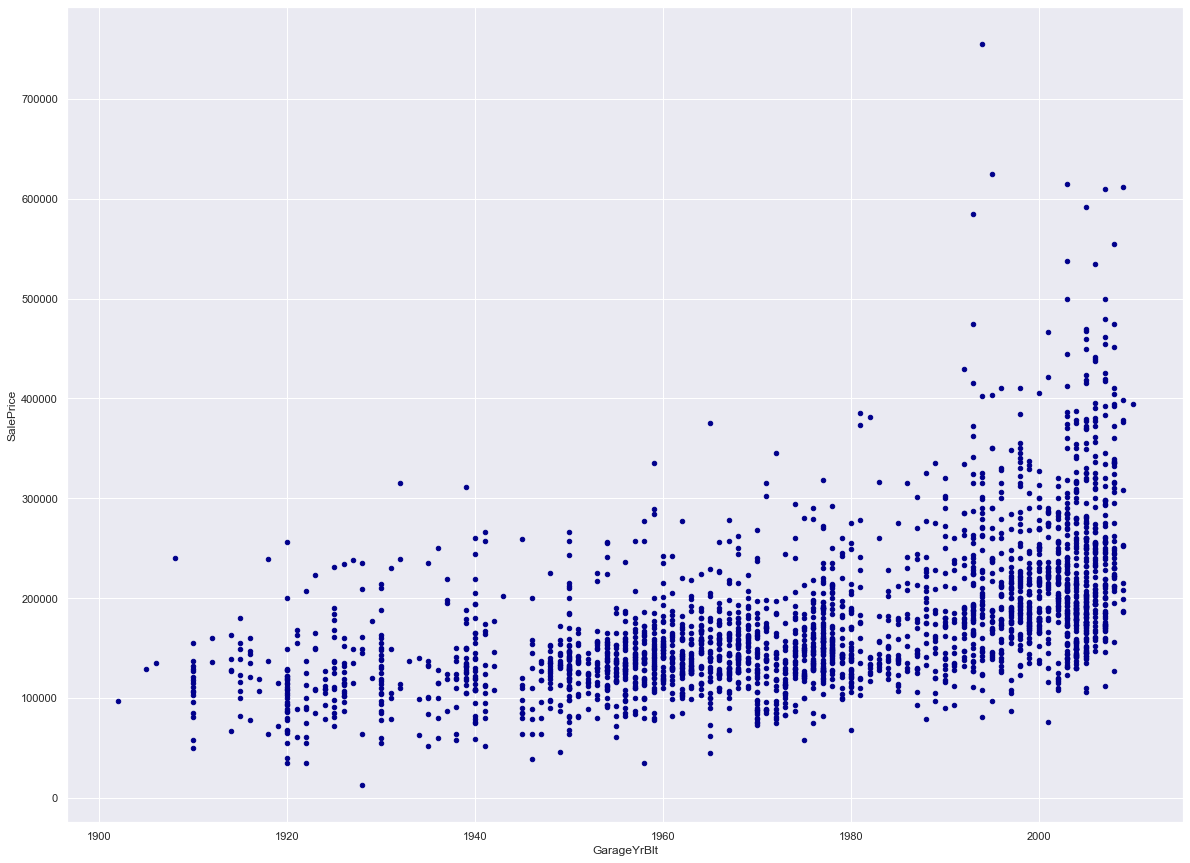

In [266]:
quality[quality['GarageYrBlt']>1900].plot.scatter(x='GarageYrBlt', y='SalePrice', c='DarkBlue')

In [269]:
quality['GarageYrBlt'].value_counts()

 2005.0    113
 2004.0     98
 2003.0     90
 2006.0     68
 2007.0     68
 1977.0     64
 1998.0     54
 2000.0     54
 2002.0     54
 1999.0     52
 1993.0     49
 1950.0     49
 1976.0     44
 2008.0     44
 1978.0     44
 1968.0     43
 1997.0     41
 2001.0     40
 1970.0     39
 1994.0     39
 1959.0     38
 1958.0     38
 1996.0     37
 1960.0     37
 1967.0     37
 1966.0     37
 1956.0     37
 1962.0     37
 1980.0     36
 1954.0     36
 1920.0     33
 1964.0     33
 1957.0     33
 1963.0     32
 1995.0     32
 1974.0     31
 1965.0     31
 1940.0     30
 1961.0     29
 1975.0     29
 1969.0     29
 1973.0     28
 1979.0     27
 1971.0     27
 1930.0     27
 1992.0     27
 1990.0     27
 1955.0     27
 1972.0     26
 1953.0     21
 1939.0     21
 1988.0     19
 1987.0     19
 1948.0     19
 1951.0     18
 1910.0     17
 1925.0     17
 1989.0     17
 1991.0     17
 1985.0     16
 1984.0     16
 1981.0     16
 1926.0     16
 1949.0     15
 1941.0     14
 2009.0     12
 1986.0   

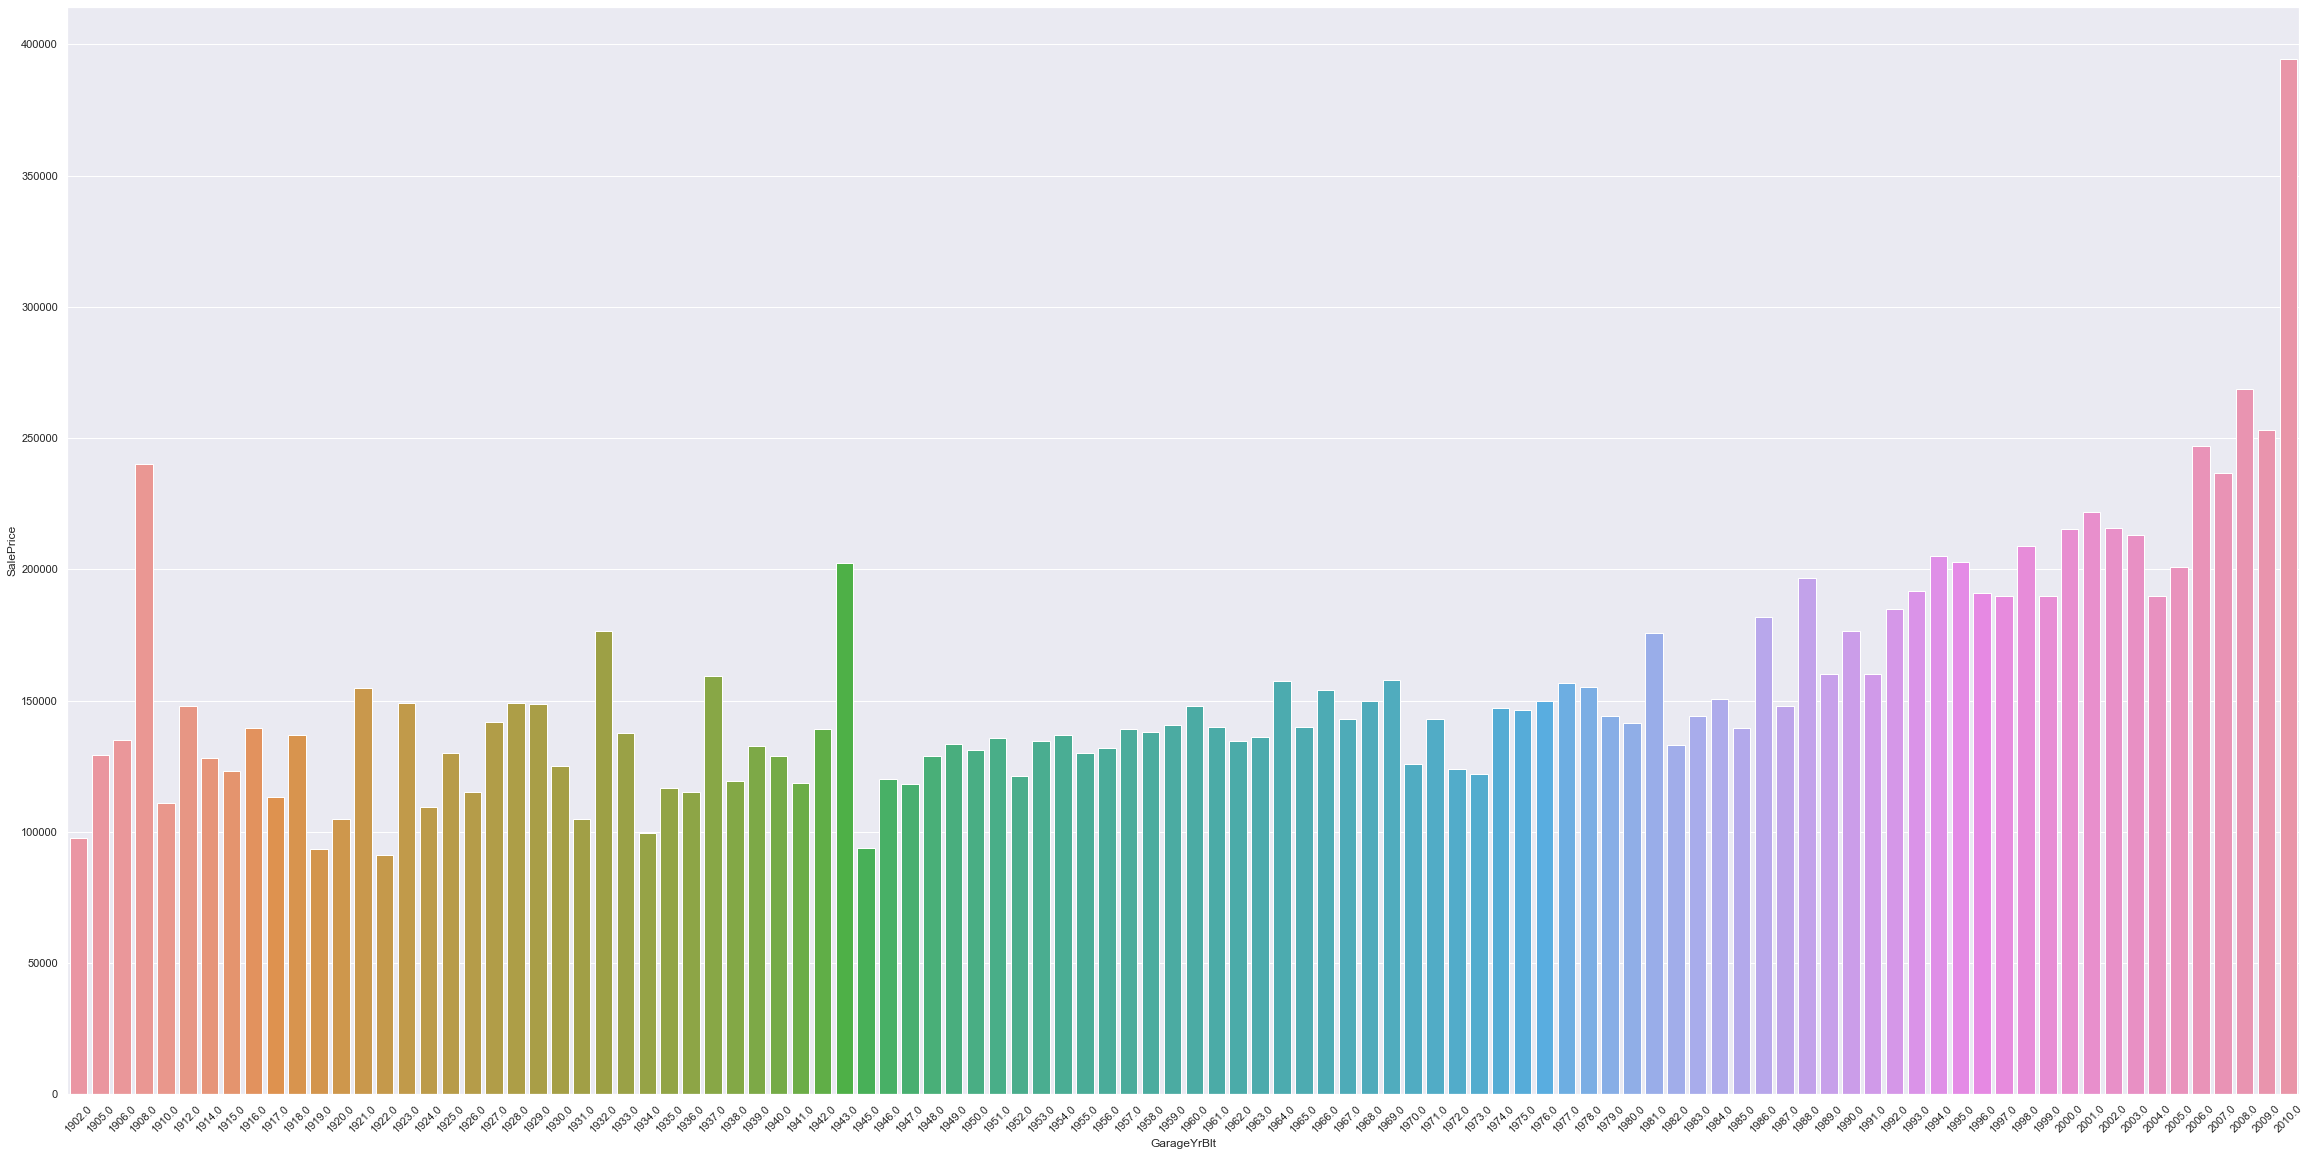

In [268]:
medianPriceGarageYrBlt = quality[quality['GarageYrBlt']>1900].groupby(by=["GarageYrBlt"])["SalePrice"].median().to_frame()
medianPriceGarageYrBlt.reset_index(inplace=True)
sns.barplot(x='GarageYrBlt', y='SalePrice', data= medianPriceGarageYrBlt)
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(40,20)})

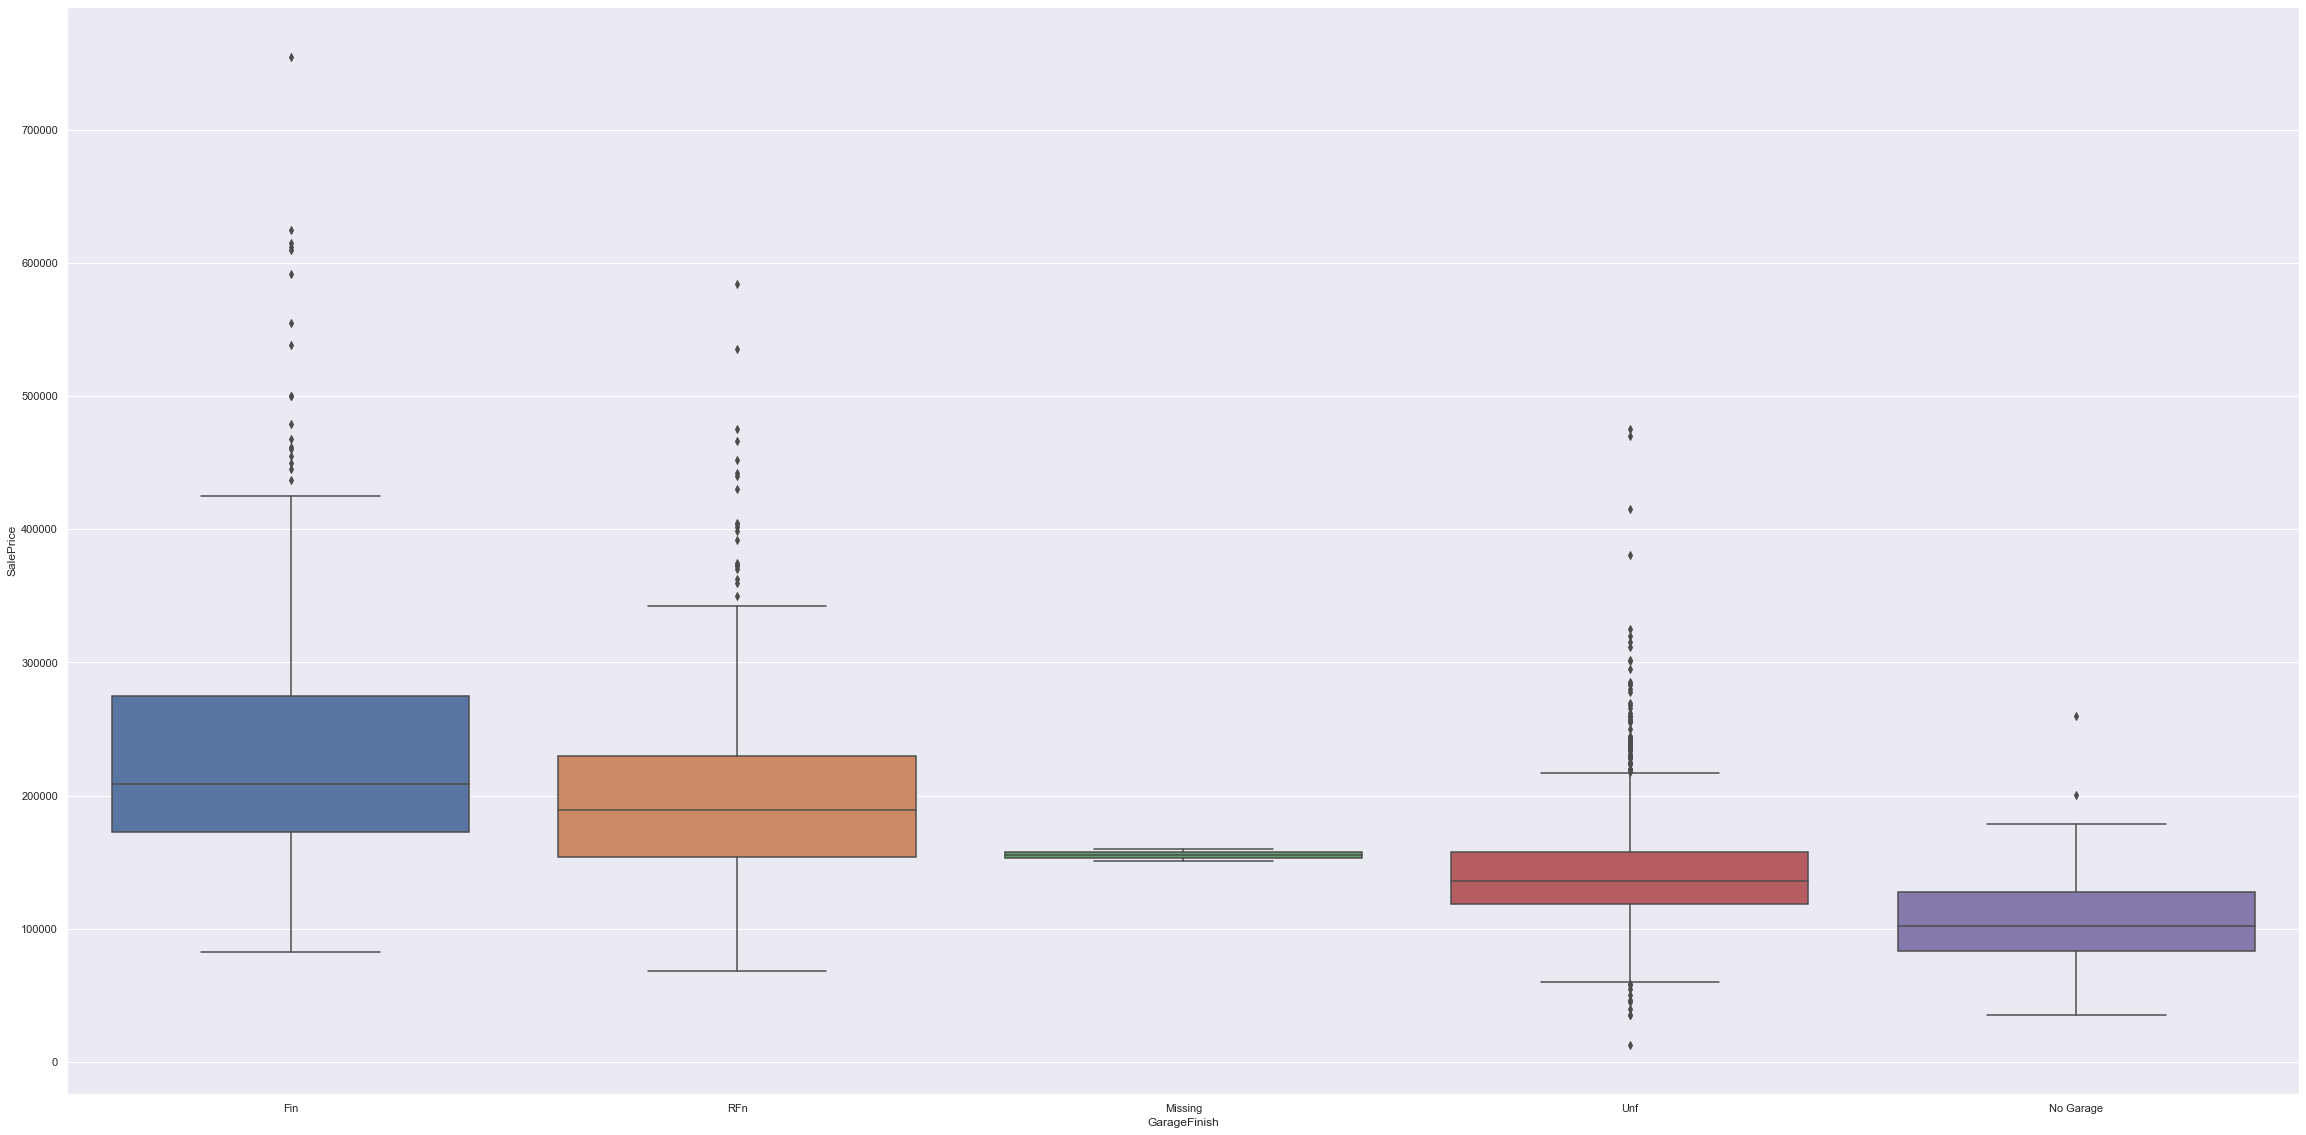

In [271]:
# GarageFinish: Interior finish of the garage
#        Fin	Finished
#        RFn	Rough Finished	
#        Unf	Unfinished
ordered=quality.groupby(by=["GarageFinish"])["SalePrice"].median().sort_values(ascending=False).index
sns.boxplot(x='GarageFinish', y='SalePrice', data= quality, order=ordered)
sns.set(rc={'figure.figsize':(20,15)}) 

In [272]:
# GarageFinish: Interior finish of the garage
# #        Fin	Finished
# #        RFn	Rough Finished	
# #        Unf	Unfinished
quality['GarageFinish'].value_counts()

Unf          1112
RFn           718
Fin           621
No Garage     127
Missing         2
Name: GarageFinish, dtype: int64

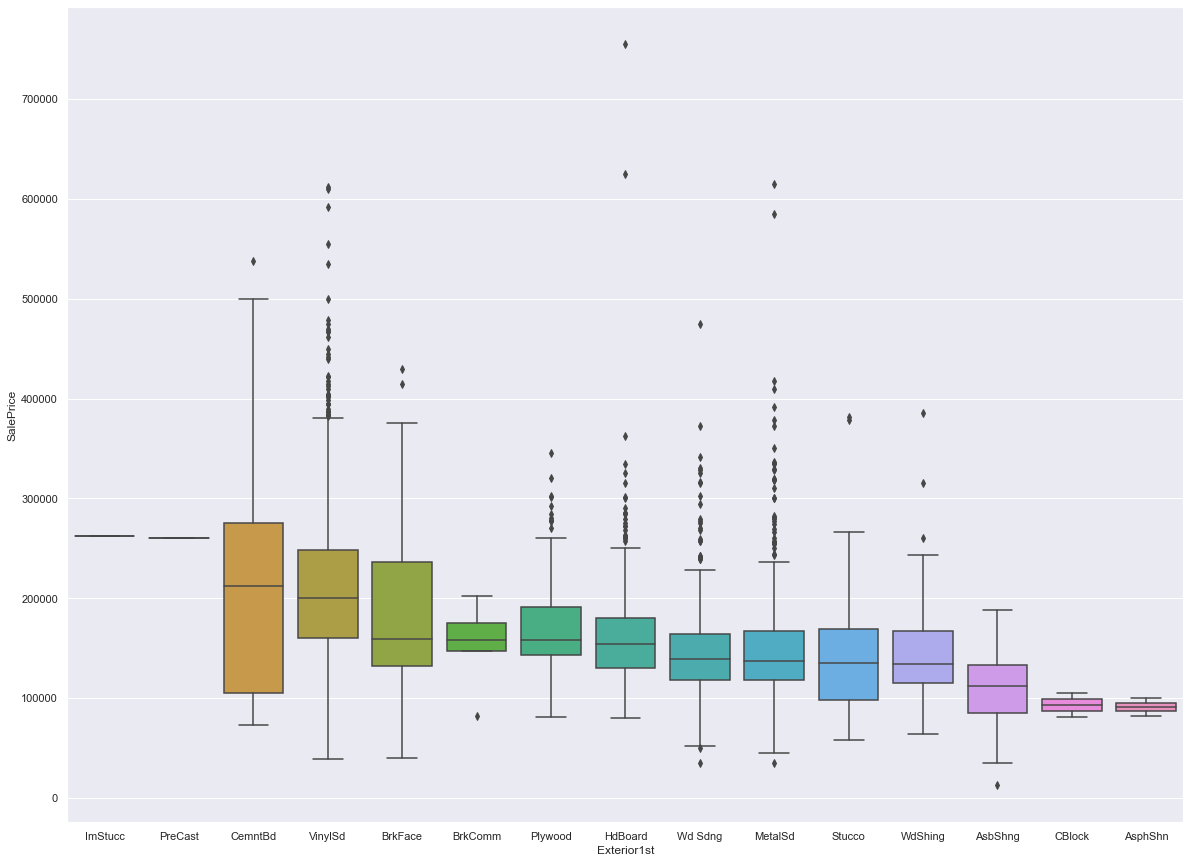

In [273]:
# Exterior1st: Exterior covering on house
ordered=quality.groupby(by=["Exterior1st"])["SalePrice"].median().sort_values(ascending=False).index
sns.boxplot(x='Exterior1st', y='SalePrice', data= quality, order=ordered)
sns.set(rc={'figure.figsize':(20,15)}) 

In [274]:
# Exterior1st: Exterior covering on house
#        AsbShng	Asbestos Shingles
#        AsphShn	Asphalt Shingles
#        BrkComm	Brick Common
#        BrkFace	Brick Face
#        CBlock	Cinder Block
#        CemntBd	Cement Board
#        HdBoard	Hard Board
#        ImStucc	Imitation Stucco
#        MetalSd	Metal Siding
#        Other	Other
#        Plywood	Plywood
#        PreCast	PreCast	
#        Stone	Stone
#        Stucco	Stucco
#        VinylSd	Vinyl Siding
#        Wd Sdng	Wood Siding
#        WdShing	Wood Shingles
quality['Exterior1st'].value_counts()

VinylSd    868
HdBoard    416
MetalSd    407
Wd Sdng    385
Plywood    194
CemntBd     97
BrkFace     80
WdShing     51
Stucco      37
AsbShng     34
BrkComm      5
AsphShn      2
CBlock       2
PreCast      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [288]:
quality.corr(method ='pearson')

,SalePrice,OverallQual,YearBuilt,YearRemodAdd,GarageYrBlt
SalePrice,1.000000,0.790501,0.544370,0.514309,0.234816
OverallQual,0.790501,1.000000,0.574400,0.546297,0.249957
YearBuilt,0.544370,0.574400,1.000000,0.572276,0.407935
YearRemodAdd,0.514309,0.546297,0.572276,1.000000,0.244108
GarageYrBlt,0.234816,0.249957,0.407935,0.244108,1.000000


In [287]:
# Kendall is a test of strength of dependece (i.e. one could be written as a linear function of the other)
quality.corr(method ='kendall')

,SalePrice,OverallQual,YearBuilt,YearRemodAdd,GarageYrBlt
SalePrice,1.000000,0.655243,0.474435,0.406927,0.445704
OverallQual,0.655243,1.000000,0.500250,0.426770,0.477593
YearBuilt,0.474435,0.500250,1.000000,0.614515,0.847755
YearRemodAdd,0.406927,0.426770,0.614515,1.000000,0.611155
GarageYrBlt,0.445704,0.477593,0.847755,0.611155,1.000000


In [294]:
quality.to_csv('./quality.csv')

In [ ]:
# price = housing[['SalePrice']]
# price.shape

In [24]:
# starters = housing[['MoSold', 'YrSold','MSZoning', 'Neighborhood','Condition1', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'LandContour', 'LandSlope','BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageArea','OverallQual','YearBuilt','YearRemodAdd','BldgType','HouseStyle','ExterQual','KitchenQual','BsmtQual','BsmtExposure','Foundation','GarageType','GarageYrBlt','GarageFinish','Exterior1st','Heating','HeatingQC','Electrical','FireplaceQu']]
# starters.shape

(2580, 42)

In [289]:
quality.columns

Index(['SalePrice', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BldgType',
       'HouseStyle', 'ExterQual', 'KitchenQual', 'BsmtQual', 'BsmtExposure',
       'Foundation', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'Exterior1st'],
      dtype='object')